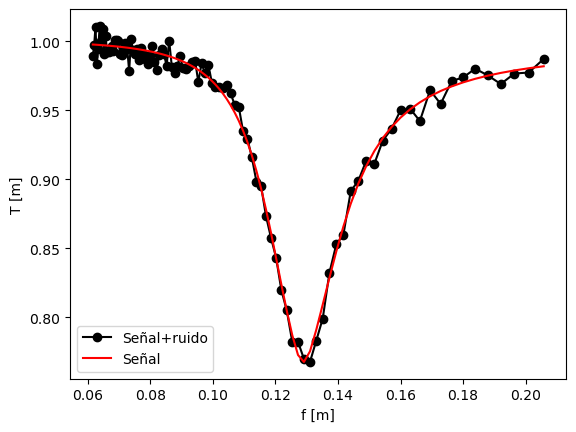

In [1]:
from funciones.ruido import ruido
from matplotlib import pyplot as plt
import numpy as np
from funciones.fscanTH2 import fscanTH2
from funciones.focalcurr import focalcurr
import pandas as pd
import os

######################## PARAMETROS EXPERIMENTALES.
df = pd.read_csv('Parametros_fscan.txt', delimiter = "\t",index_col=0)



corriente = np.arange(0, 202, 2)  #Current [mA]
######################## PARAMETROS QUE SE ASUMEN COMO LOS REALES
focal = focalcurr('opt2', corriente)  #focal distance [m]
N = 11 #number of terms in the sum of the theoretical formula
#NN = int(df.loc['NN']['Valor']) # sample size
beta = 500e-11 # TPA seed in (m/W )
L= 0.70e-3 # thickness in (m).
Pavg = 95e-3# Average power in (W)
Tp = 2e-9 # pulse width FWHM in (s)
wl = 1063.5e-9 #central wavelength in (m)
D = 1.5e-3 # beam diameter in (m)
ds = 130e-3# Distance EFTL-sample (m)
Cf = 1.1 # beam correction coeff
alfa = 975 # linear absorption in (1/m) (CdS@790 -2.64e-11, ZnSe@790 4.7720, CdSe@790 369.8)alfa_e = float(df.loc['alfa_e']['Valor'])*float(df.loc['alfa_e']['Valor2'])
R =0.33 # reflection percentage (CdS@790 = 0.15670, ZnSe@790 0.18164)
freq = 11e3 #Frecuencia en HZ
n=2
sigmas=0.006  #Desviación estandar.
########################

path = os.getcwd() + '\\Datos\data_simulada.txt'  # Ruta de archivo donde se guardaran los datos simulados
T = fscanTH2(focal, beta, L, Pavg, Tp, wl, D, ds, Cf, alfa, R, N)  #Señal simulada
data = np.column_stack([corriente, ruido(T,sigmas)]) # corriente, señal simulada con ruido
np.savetxt(path, data, fmt=['%d','%.8f'])

#EJEMPLO
plt.plot(focal, ruido(T,sigmas),color='k',marker='o',label="Señal+ruido")
plt.plot(focal, T,color='r',label="Señal")
plt.xlabel("f [m]")
plt.ylabel("T [m]")
plt.legend()

number of betas: 3
betas: [4.34375e-09 4.40625e-09 3.87500e-09]
number of betas: 5
betas: [4.65625000e-09 3.85546875e-09 3.51562500e-09 4.25000000e-09
 3.25000000e-09]
number of betas: 3
betas: [4.75000000e-09 3.76953125e-09 4.58593750e-09]
number of betas: 4
betas: [4.3750000e-09 5.0625000e-09 4.3750000e-09 4.5078125e-09]
number of betas: 3
betas: [3.24609375e-09 5.14062500e-09 4.42578125e-09]
number of betas: 1
betas: [4.65625e-09]
number of betas: 1
betas: [3.671875e-09]
number of betas: 3
betas: [5.75000000e-09 4.16015625e-09 3.68750000e-09]
number of betas: 6
betas: [2.3125000e-09 5.0000000e-09 4.8750000e-09 4.0546875e-09 4.9921875e-09
 2.6250000e-09]
no
number of betas: 5
betas: [4.8750000e-09 4.4062500e-09 6.2578125e-09 4.0000000e-09 5.0625000e-09]
betas_f [4.22826483e-07 4.02330719e-07 4.35963330e-07 4.57266643e-07
 4.21924610e-07 4.65625000e-07 3.67187500e-07 4.48102334e-07
 4.00754689e-07 0.00000000e+00 4.89778939e-07]


array([4.22826483e-07, 4.02330719e-07, 4.35963330e-07, 4.57266643e-07,
       4.21924610e-07, 4.65625000e-07, 3.67187500e-07, 4.48102334e-07,
       4.00754689e-07, 0.00000000e+00, 4.89778939e-07])

<Figure size 2400x1000 with 0 Axes>

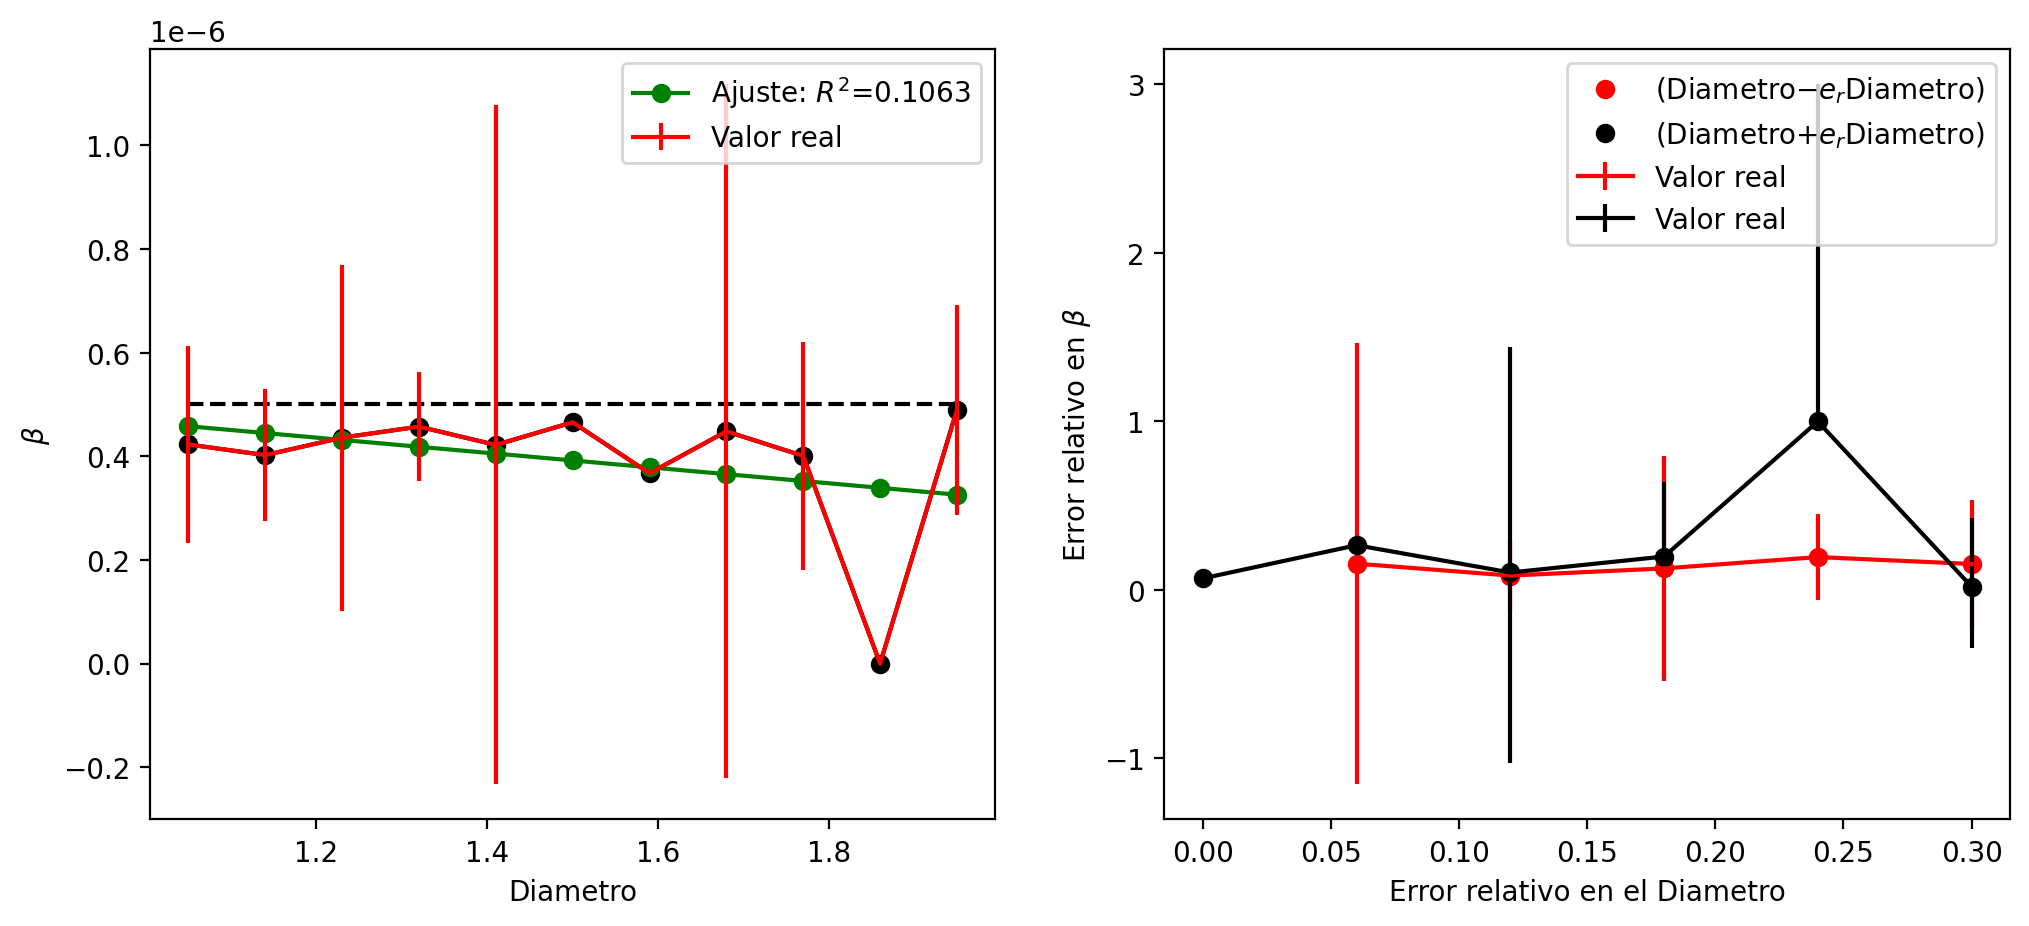

In [2]:
from funciones.funcion import funcion

ths = 0.01
funcion('D_c', ths, 0.3, sigmas, N)
